<a href="https://colab.research.google.com/github/Mhamuda/CSE4211-Artificial_Intelligence_Lab/blob/main/MNIST_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten

from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

# a) Generate a CNN model with: <br>
#  i. Two CNN hidden layers (Conv2D) of sizes 32, 64 followed by <br>
#  ii. ReLU activation and  <br>
#  iii. MaxPooling2D with kernel size (3, 3) and stride = (1, 1) <br>

#b) Use Flatten Layers to convert the feature map into 1D with a Dense layer of size 64 followed by an output Dense Layer of size 10 with SoftMax activation function.

In [ ]:
def build_cnn_model():
  inputs = Input(shape=(28,28,1))
  x = Conv2D(filters=32, kernel_size=(3,3),activation='relu', strides=(1,1), padding='same')(inputs)
  x = MaxPooling2D()(x)
  x = Conv2D(filters=64, kernel_size=(3,3), activation='relu', strides=(1,1),padding='same')(x)
  x = MaxPooling2D()(x)
  x = Flatten()(x)
  x = Dense(64,activation='relu')(x)
  outputs = Dense(10,activation='softmax')(x)

  model = Model(inputs, outputs, name='CNN')
  return model


#c) Display the generated CNN with the required number of parameters.

In [ ]:
model1 = build_cnn_model()
model1.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

#Load MNIST dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

###(convulation layer 4d data expect kore tai data er dimension expand korci)

#Expand dimension

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

#One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Data augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=12,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.3,
    shear_range=0.3,
    brightness_range=[0.8,1.2]
)

#Augmented train data concatination

In [ ]:
geo_augmented_images = np.array([datagen.random_transform(img) for img in x_train[:50000]])
geo_augmented_labels = y_train[:50000]

augmented_train_images = np.concatenate([
    x_train,
    geo_augmented_images
])

augmented_train_labels = np.concatenate([
    y_train,
    geo_augmented_labels
])

print(len(augmented_train_labels))

110000


#Augmented test data concatination

In [ ]:
geo_augmented_images = np.array([datagen.random_transform(img) for img in x_test[:5000]])
geo_augmented_labels = y_test[:5000]

augmented_test_images = np.concatenate([
    x_test,
    geo_augmented_images
])

augmented_test_labels = np.concatenate([
    y_test,
    geo_augmented_labels
])

print(len(augmented_test_labels))

15000


In [ ]:
x_train_aug = augmented_train_images
y_train_aug = augmented_train_labels
x_test_aug = augmented_test_images
y_test_aug = augmented_test_labels

Text(0.5, 1.0, 'Label: 5')

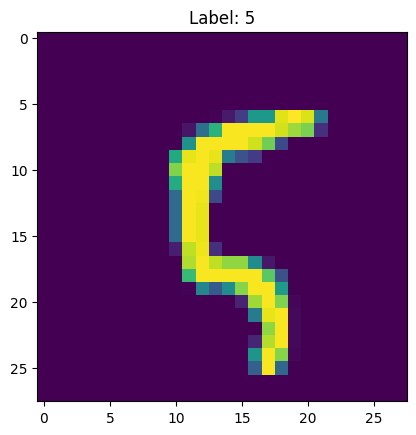

In [ ]:
plt.imshow(x_train_aug[100])
plt.title(f'Label: {np.argmax(y_train_aug[100])}')

#Normalization

In [ ]:
x_train_aug = x_train_aug/255
x_test_aug = x_test_aug/255

x_train = x_train/255
x_test = x_test/255

print('Augmented train data shape: ', x_train_aug.shape)
print('Augmented test data shape: ',x_test_aug.shape)

Augmented train data shape:  (110000, 28, 28, 1)
Augmented test data shape:  (15000, 28, 28, 1)


#Train the model without augmentation

In [ ]:
model1 = build_cnn_model()
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 5
)

In [ ]:
history1 = model1.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 111ms/step - accuracy: 0.6539 - loss: 1.1732 - val_accuracy: 0.9360 - val_loss: 0.2302
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 107s 142ms/step - accuracy: 0.9349 - loss: 0.2229 - val_accuracy: 0.9568 - val_loss: 0.1494
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 124s 118ms/step - accuracy: 0.9583 - loss: 0.1407 - val_accuracy: 0.9696 - val_loss: 0.1058
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 65s 86ms/step - accuracy: 0.9697 - loss: 0.1039 - val_accuracy: 0.9762 - val_loss: 0.0850
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 89s 95ms/step - accuracy: 0.9755 - loss: 0.0844 - val_accuracy: 0.9785 - val_loss: 0.0715
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 75s 86ms/step - accuracy: 0.9790 - loss: 0.0694 - val_accuracy: 0.9809 - val_loss: 0.0681
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 66s 88ms/step - accuracy: 0.9820 - loss: 0.0598 - val_accuracy: 0.9832 - val_loss: 0.0617
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 95s 126ms/step - accuracy: 0.9844 - loss: 0.0

#Plotting the training accuracy vs validation accuracy and training loss vs validation loss (non_augmented data)

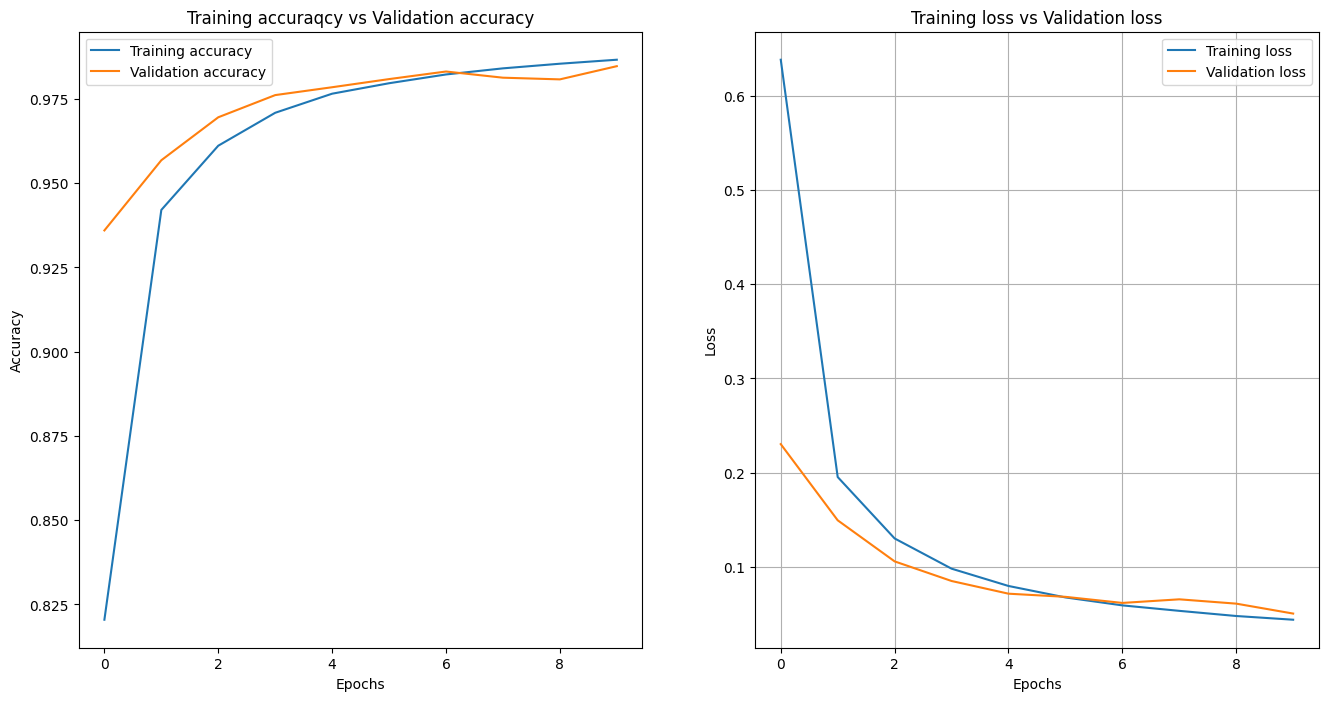

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'],label='Training accuracy')
plt.plot(history1.history['val_accuracy'],label='Validation accuracy')
plt.title('Training accuraqcy vs Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

#Train the model with augmentation

In [ ]:
model2 = build_cnn_model()
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 5
)

In [ ]:
history2 = model2.fit(
    x_train_aug,
    y_train_aug,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 143s 103ms/step - accuracy: 0.6276 - loss: 1.2200 - val_accuracy: 0.7291 - val_loss: 0.8652
Epoch 2/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 118s 86ms/step - accuracy: 0.9029 - loss: 0.3248 - val_accuracy: 0.8190 - val_loss: 0.5856
Epoch 3/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 162s 100ms/step - accuracy: 0.9328 - loss: 0.2272 - val_accuracy: 0.8534 - val_loss: 0.4812
Epoch 4/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 142s 100ms/step - accuracy: 0.9458 - loss: 0.1811 - val_accuracy: 0.8736 - val_loss: 0.4141
Epoch 5/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 131s 92ms/step - accuracy: 0.9541 - loss: 0.1571 - val_accuracy: 0.8862 - val_loss: 0.3732
Epoch 6/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 180s 119ms/step - accuracy: 0.9557 - loss: 0.1436 - val_accuracy: 0.8896 - val_loss: 0.3631
Epoch 7/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 181s 132ms/step - accuracy: 0.9608 - loss: 0.1289 - val_accuracy: 0.8989 - val_loss: 0.3343
Epoch 8/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 159s 101ms/step - accu

# Plotting the training accuracy vs validation accuracy and training loss vs validation loss (augmented data)

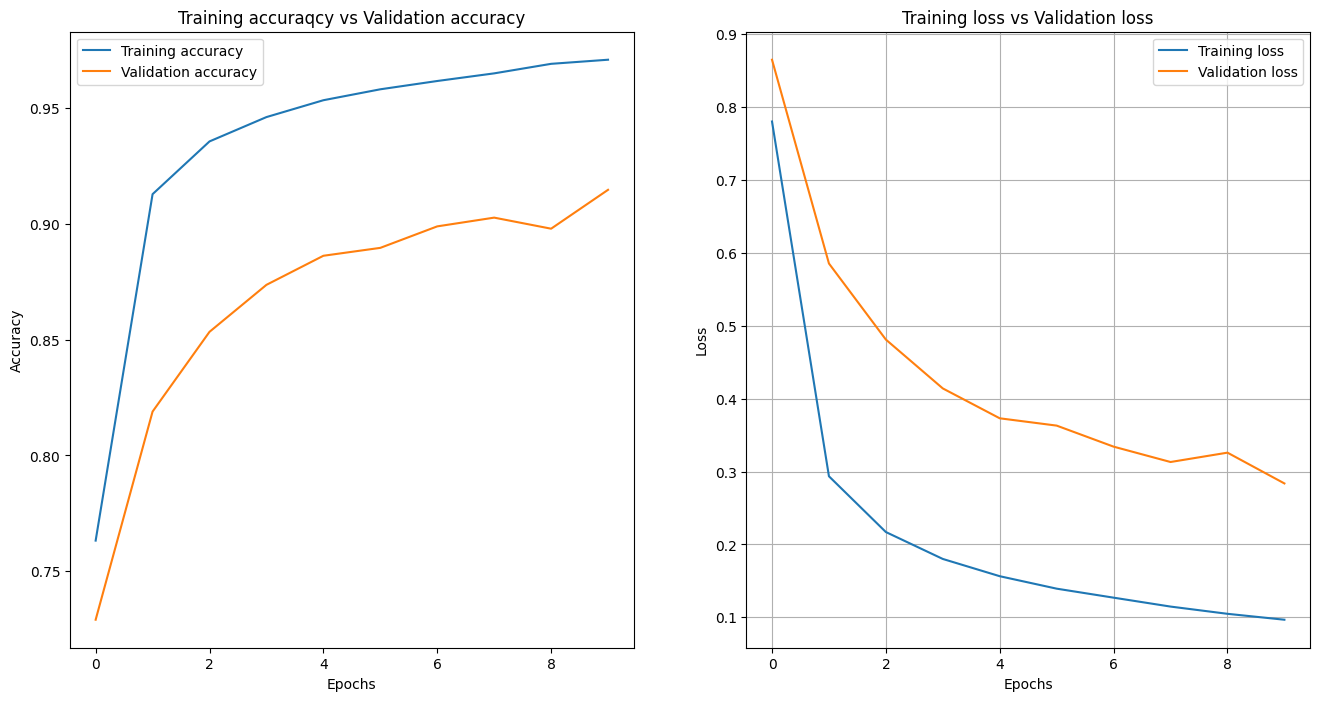

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'],label='Training accuracy')
plt.plot(history2.history['val_accuracy'],label='Validation accuracy')
plt.title('Training accuraqcy vs Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

#Accuracy with normat test data on CNN1 and CNN2

In [ ]:
test_loss_cnn1, test_accu_cnn1 = model1.evaluate(x_test, y_test)
test_loss_cnn2, test_accu_cnn2 = model2.evaluate(x_test, y_test)

print(f'CNN1 test accuracy: {test_accu_cnn1*100: .8f}%')
print(f'CNN2 test accuracy: {test_accu_cnn2*100: .8f}%')

print(f'CNN1 test loss: {test_loss_cnn1: .8f}')
print(f'CNN2 test loss: {test_loss_cnn2: .8f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9833 - loss: 0.0520
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9848 - loss: 0.0452
CNN1 test accuracy:  98.60000014%
CNN2 test accuracy:  98.73999953%
CNN1 test loss:  0.04448463
CNN2 test loss:  0.03771622


#Accuracy with augmented test data on CNN1 and CNN2

In [ ]:
aug_test_loss_cnn1, aug_test_accu_cnn1 = model1.evaluate(x_test_aug, y_test_aug)
aug_test_loss_cnn2, aug_test_accu_cnn2 = model2.evaluate(x_test_aug, y_test_aug)

print(f'CNN1 test accuracy: {aug_test_accu_cnn1*100: 0.8f}%')
print(f'CNN2 test accuracy: {aug_test_accu_cnn2*100: 0.8f}%')

print(f'CNN1 test loss: {aug_test_loss_cnn1: 0.8f}')
print(f'CNN2 test loss: {aug_test_loss_cnn2: 0.8f}')

469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9488 - loss: 0.2623
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9800 - loss: 0.0600
CNN1 test accuracy:  80.34666777%
CNN2 test accuracy:  95.86666822%
CNN1 test loss:  1.14807189
CNN2 test loss:  0.12795618


#Printing accuracy

In [ ]:
import pandas as pd
from tabulate import tabulate

data={
    'Original Test Accuracy (%)': [
        f'{test_accu_cnn1*100: .5f}%',
        f'{test_accu_cnn2*100: .5f}%'
    ],
    'Augmented Tes Accuracy (%)':[
        f'{aug_test_accu_cnn1*100: .5f}%',
        f'{aug_test_accu_cnn2*100: .5f}%'
    ]
}

df = pd.DataFrame(data, index=['CNN1 (Original Train)', 'CNN2(Augmented Train)'])
print(tabulate(df,headers='keys', tablefmt='fancy_grid'))

╒═══════════════════════╤══════════════════════════════╤══════════════════════════════╕
│                       │ Original Test Accuracy (%)   │ Augmented Tes Accuracy (%)   │
╞═══════════════════════╪══════════════════════════════╪══════════════════════════════╡
│ CNN1 (Original Train) │ 98.60000%                    │ 80.34667%                    │
├───────────────────────┼──────────────────────────────┼──────────────────────────────┤
│ CNN2(Augmented Train) │ 98.74000%                    │ 95.86667%                    │
╘═══════════════════════╧══════════════════════════════╧══════════════════════════════╛


#Model accuracy comparison

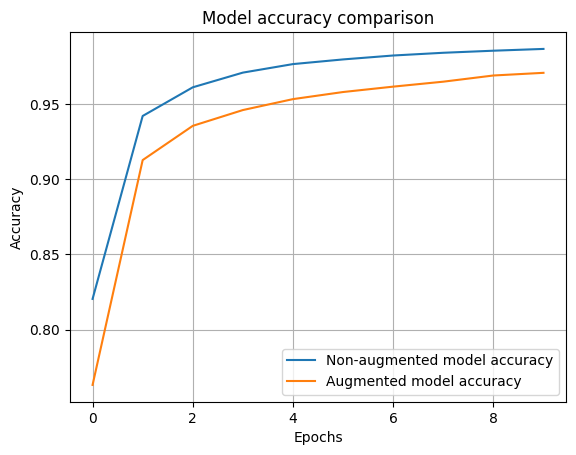

In [ ]:
plt.plot(history1.history['accuracy'],label='Non-augmented model accuracy')
plt.plot(history2.history['accuracy'],label='Augmented model accuracy')
plt.title('Model accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()